<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

`Для воспроизводимости результатов`

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
!pip install ydata-profiling -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.5 MB/s eta 0:00:00


In [4]:
from ydata_profiling import ProfileReport

In [5]:
print('Пропуски в обучении:', df_train.columns[df_train.isna().any()].tolist(), sep='\n')
print()
print('Пропуски в тесте:', df_test.columns[df_test.isna().any()].tolist(), sep='\n')

Пропуски в обучении:
['mileage', 'engine', 'max_power', 'torque', 'seats']

Пропуски в тесте:
['mileage', 'engine', 'max_power', 'torque', 'seats']


In [6]:
print('Дубликатов в обучении:', df_train.duplicated().sum())
print('Дубликатов в тесте:', df_test.duplicated().sum())

Дубликатов в обучении: 985
Дубликатов в тесте: 62


In [7]:
profile = ProfileReport(df_train, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [8]:
print('Статистики по числовым столбцам, train:')
df_train.describe()

Статистики по числовым столбцам, train:


year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [9]:
print('Статистики по числовым столбцам, test:')
df_test.describe()

Статистики по числовым столбцам, test:


year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [10]:
print('Статистики по категориальным столбцам, train:')
df_train.describe(include='object')

Статистики по категориальным столбцам, train:


name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [11]:
print('Статистики по категориальным столбцам, test:')
df_test.describe(include='object')

Статистики по категориальным столбцам, test:


name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

In [12]:
print('Сравнение средних train и test:')
pd.concat([df_train.mean(numeric_only=True), df_test.mean(numeric_only=True)], axis=1)

Сравнение средних train и test:


0              1
year             2013.818403    2013.681000
selling_price  639515.197171  617901.042000
km_driven       69584.615517   71393.341000
seats               5.419008       5.410805

In [13]:
print('Сравнение медиан train и test:')
pd.concat([df_train.median(numeric_only=True), df_test.median(numeric_only=True)], axis=1)

Сравнение медиан train и test:


0         1
year             2015.0    2014.0
selling_price  450000.0  434999.0
km_driven       60000.0   61500.0
seats               5.0       5.0

__Ответ:__ В целом обучающая выборка похожа на тестовую по среднему и медиане. Есть незначительные отклонения в числах.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [14]:
# your code here
print('Полных дубликатов:', df_train.drop(columns=['selling_price']).duplicated().sum())

Полных дубликатов: 1159


In [15]:
df_train[df_train.drop(columns=['selling_price']).duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [16]:
df_train = df_train[~df_train.drop(columns=['selling_price']).duplicated()]
df_train = df_train.reset_index(drop=True)

In [17]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [18]:
# your code here
df_train['mileage'] = df_train.mileage.str.extract(r'([\d\.\,]+?\s)').astype(float)
df_train['engine'] = df_train.engine.str.extract(r'([\d\.\,]+?\s)').astype(float)
df_train['max_power'] = df_train.max_power.str.extract(r'([\d\.\,]+?\s)').astype(float)

In [19]:
df_test['mileage'] = df_test.mileage.str.extract(r'([\d\.\,]+?\s)').astype(float)
df_test['engine'] = df_test.engine.str.extract(r'([\d\.\,]+?\s)').astype(float)
df_test['max_power'] = df_test.max_power.str.extract(r'([\d\.\,]+?\s)').astype(float)

In [20]:
import re

In [21]:
def get_torque(torque):
    if not isinstance(torque, str):
        return None, None

    torque_split = re.findall('(\d+?)\D', torque)
    return float(torque_split[0]), float(torque_split[-1])

df_train['torque'], df_train['max_torque_rpm'] = zip(*df_train.apply(lambda row: get_torque(row['torque']), axis=1))
df_test['torque'], df_test['max_torque_rpm'] = zip(*df_test.apply(lambda row: get_torque(row['torque']), axis=1))

In [121]:
# df_train

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






__Ответ:__
- правильно заполнять пропуски медианой, так как среднее может сильно влиять на распределение выборки, если в ней встречаются выбросы.
- медиана считается по тренировочным данным и для train, и для test

In [143]:
fill_values

{'mileage': 19.369999999999997,
 'engine': 1248.0,
 'max_power': 81.86,
 'torque': 150.0,
 'seats': 5.0,
 'max_torque_rpm': 2800.0}

In [23]:
# your code here
fill_values = {}
for col in df_train.columns[df_train.isna().any()].tolist():
    fill_values[col] = df_train[col].median()
df_train = df_train.fillna(fill_values)
print('Пропусков в трейне:', df_train.isna().sum())

Пропусков в трейне: name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


In [24]:
df_test = df_test.fillna(fill_values)
print('Пропусков в трейне:', df_test.isna().sum())

Пропусков в трейне: name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [25]:
# your code here
df_train['engine'] = df_train.engine.astype('int')
df_train['seats'] = df_train.seats.astype('int')

df_test['engine'] = df_test.engine.astype('int')
df_test['seats'] = df_test.seats.astype('int')

In [26]:
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage  engine  \
0    Diesel  Individual       Manual   First Owner    14.00    2498   
1    Diesel  Individual       Manual   First Owner    21.50    1497   
2    Petrol  Individual    Automatic   First Owner    12.90    1799   
3    Diesel  Individual       Manual   First Owner    25.10    1498   
4    Petrol  Individual       Manual  Second Owner    16.50    1172   
..      ...         ...          ...           ...      ...     ...   
995  Petrol  Individual       Manual  Second Owner    19.81    1086   
996  Petrol  Individual       Manual  Second Owner    18.60    1197   
997  Diesel  Individual       Manual   First Owner    23.00    1396   
998  Petrol  Individual       Manual   First Owner    20.36    1197   
999  Diesel  Individual       Manual   First Owner    26.00    1498   

     max_power  torque  seats  max_torque_rpm  
0       112.00   260.0      7          2200.0  
1       108.50   260.0      5          2750.0  
2       130.00   172.0      5          4300.0  
3        98.60   200.0      5          1750.0  
4        65.00    96.0      5          3000.0  
..         ...     ...    ...             ...  
995      68.05    99.0      5          4500.0  
996      81.83   114.0      5          4000.0  
997      90.00    22.0      5          2750.0  
998      78.90   111.0      5          4000.0  
999      98.60   200.0      5          1750.0  

[1000 rows x 14 columns]

__Ответ:__ `Количество сидений является ограниченным числом (2-5 обычно, если не включать автобусы), что сравнимо с категориальными переменными.`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [27]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.948422   161.200000     5.426712     2899.330479  
std      31.577884    91.214378     0.982344     1044.156425  
min      32.800000     4.000000     2.000000        0.000000  
25%      68.000000    99.000000     5.000000     2000.000000  
50%      81.860000   150.000000     5.000000     2800.000000  
75%      99.000000   200.000000     5.000000     3750.000000  
max     400.000000   789.000000    14.000000     5300.000000

__Ответ:__ `Заполнение медианой может повлиять на среднее и стандартное отклонение, но на остальные параметры нет.`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

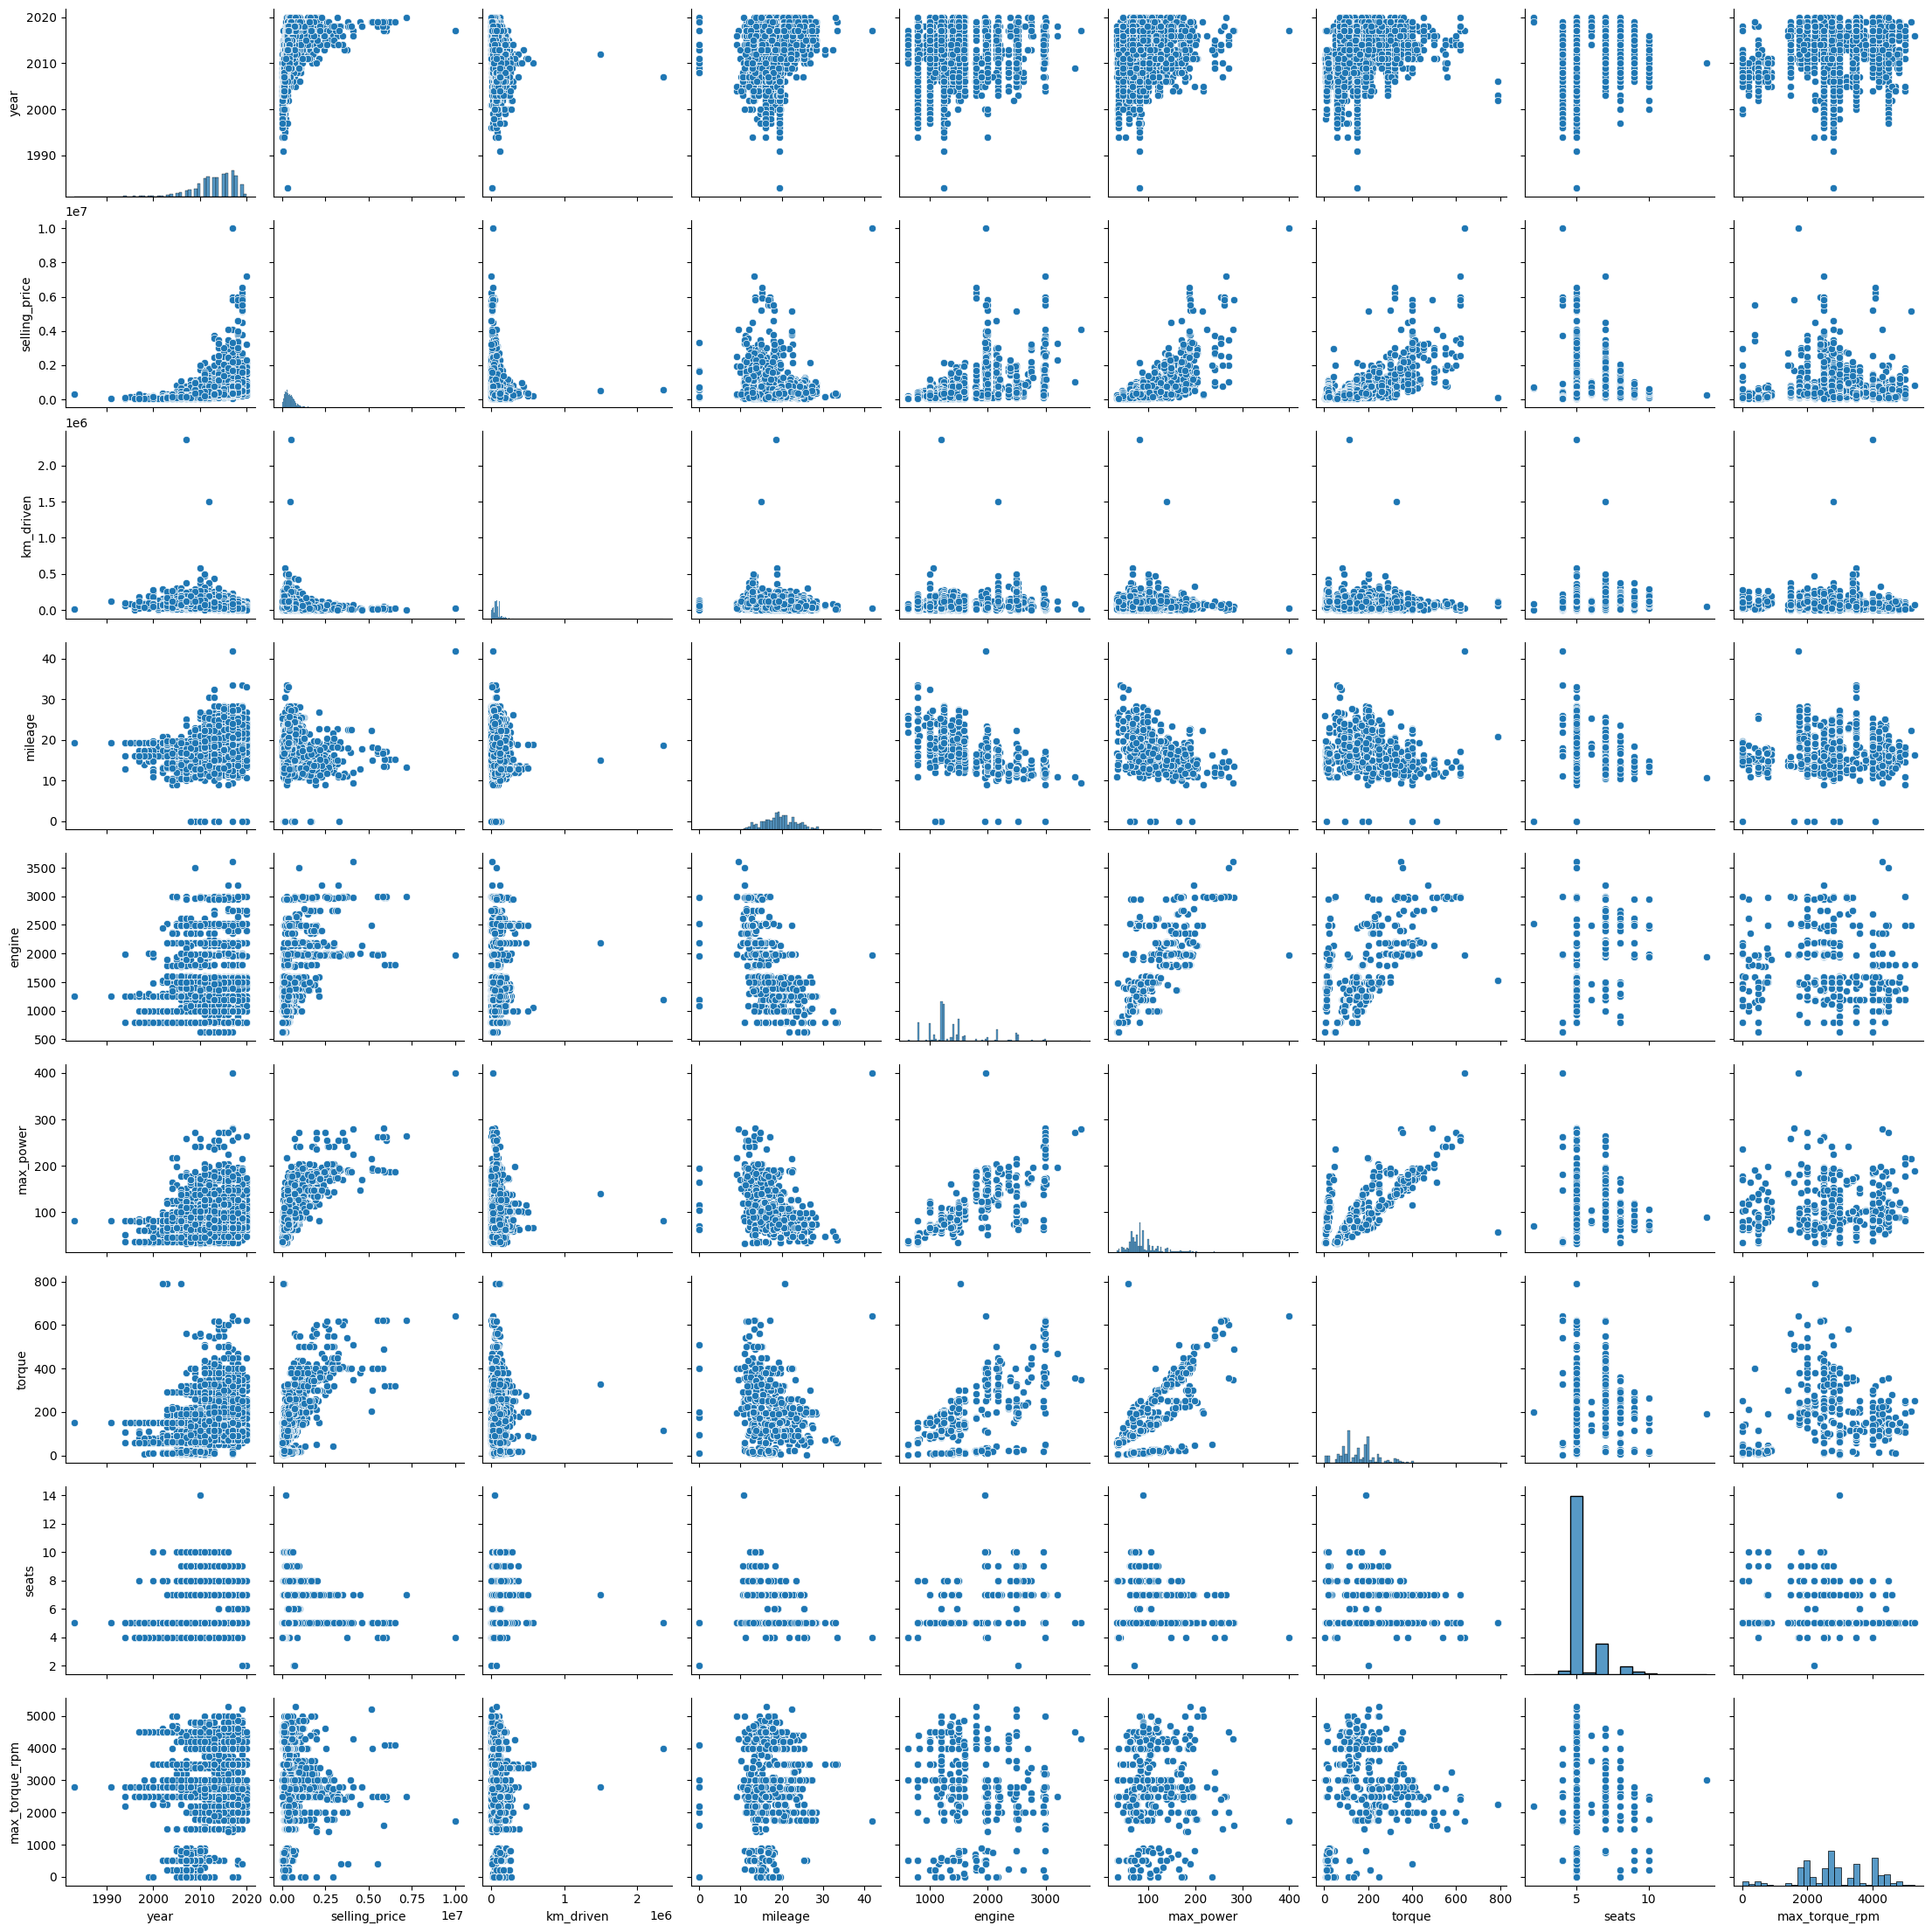

In [28]:
# your code here
sns.pairplot(df_train)

__Ответ:__ Можно заметить небольшую связь целевой переменной с остальными:
- с годом цены становятся выше
- чем меньше пробег, тем выше цена
- при увеличении max_power и torque тоже растёт цена

Корреляция:
- есть заметная корреляция переменных torque и max_power, max_power и engine

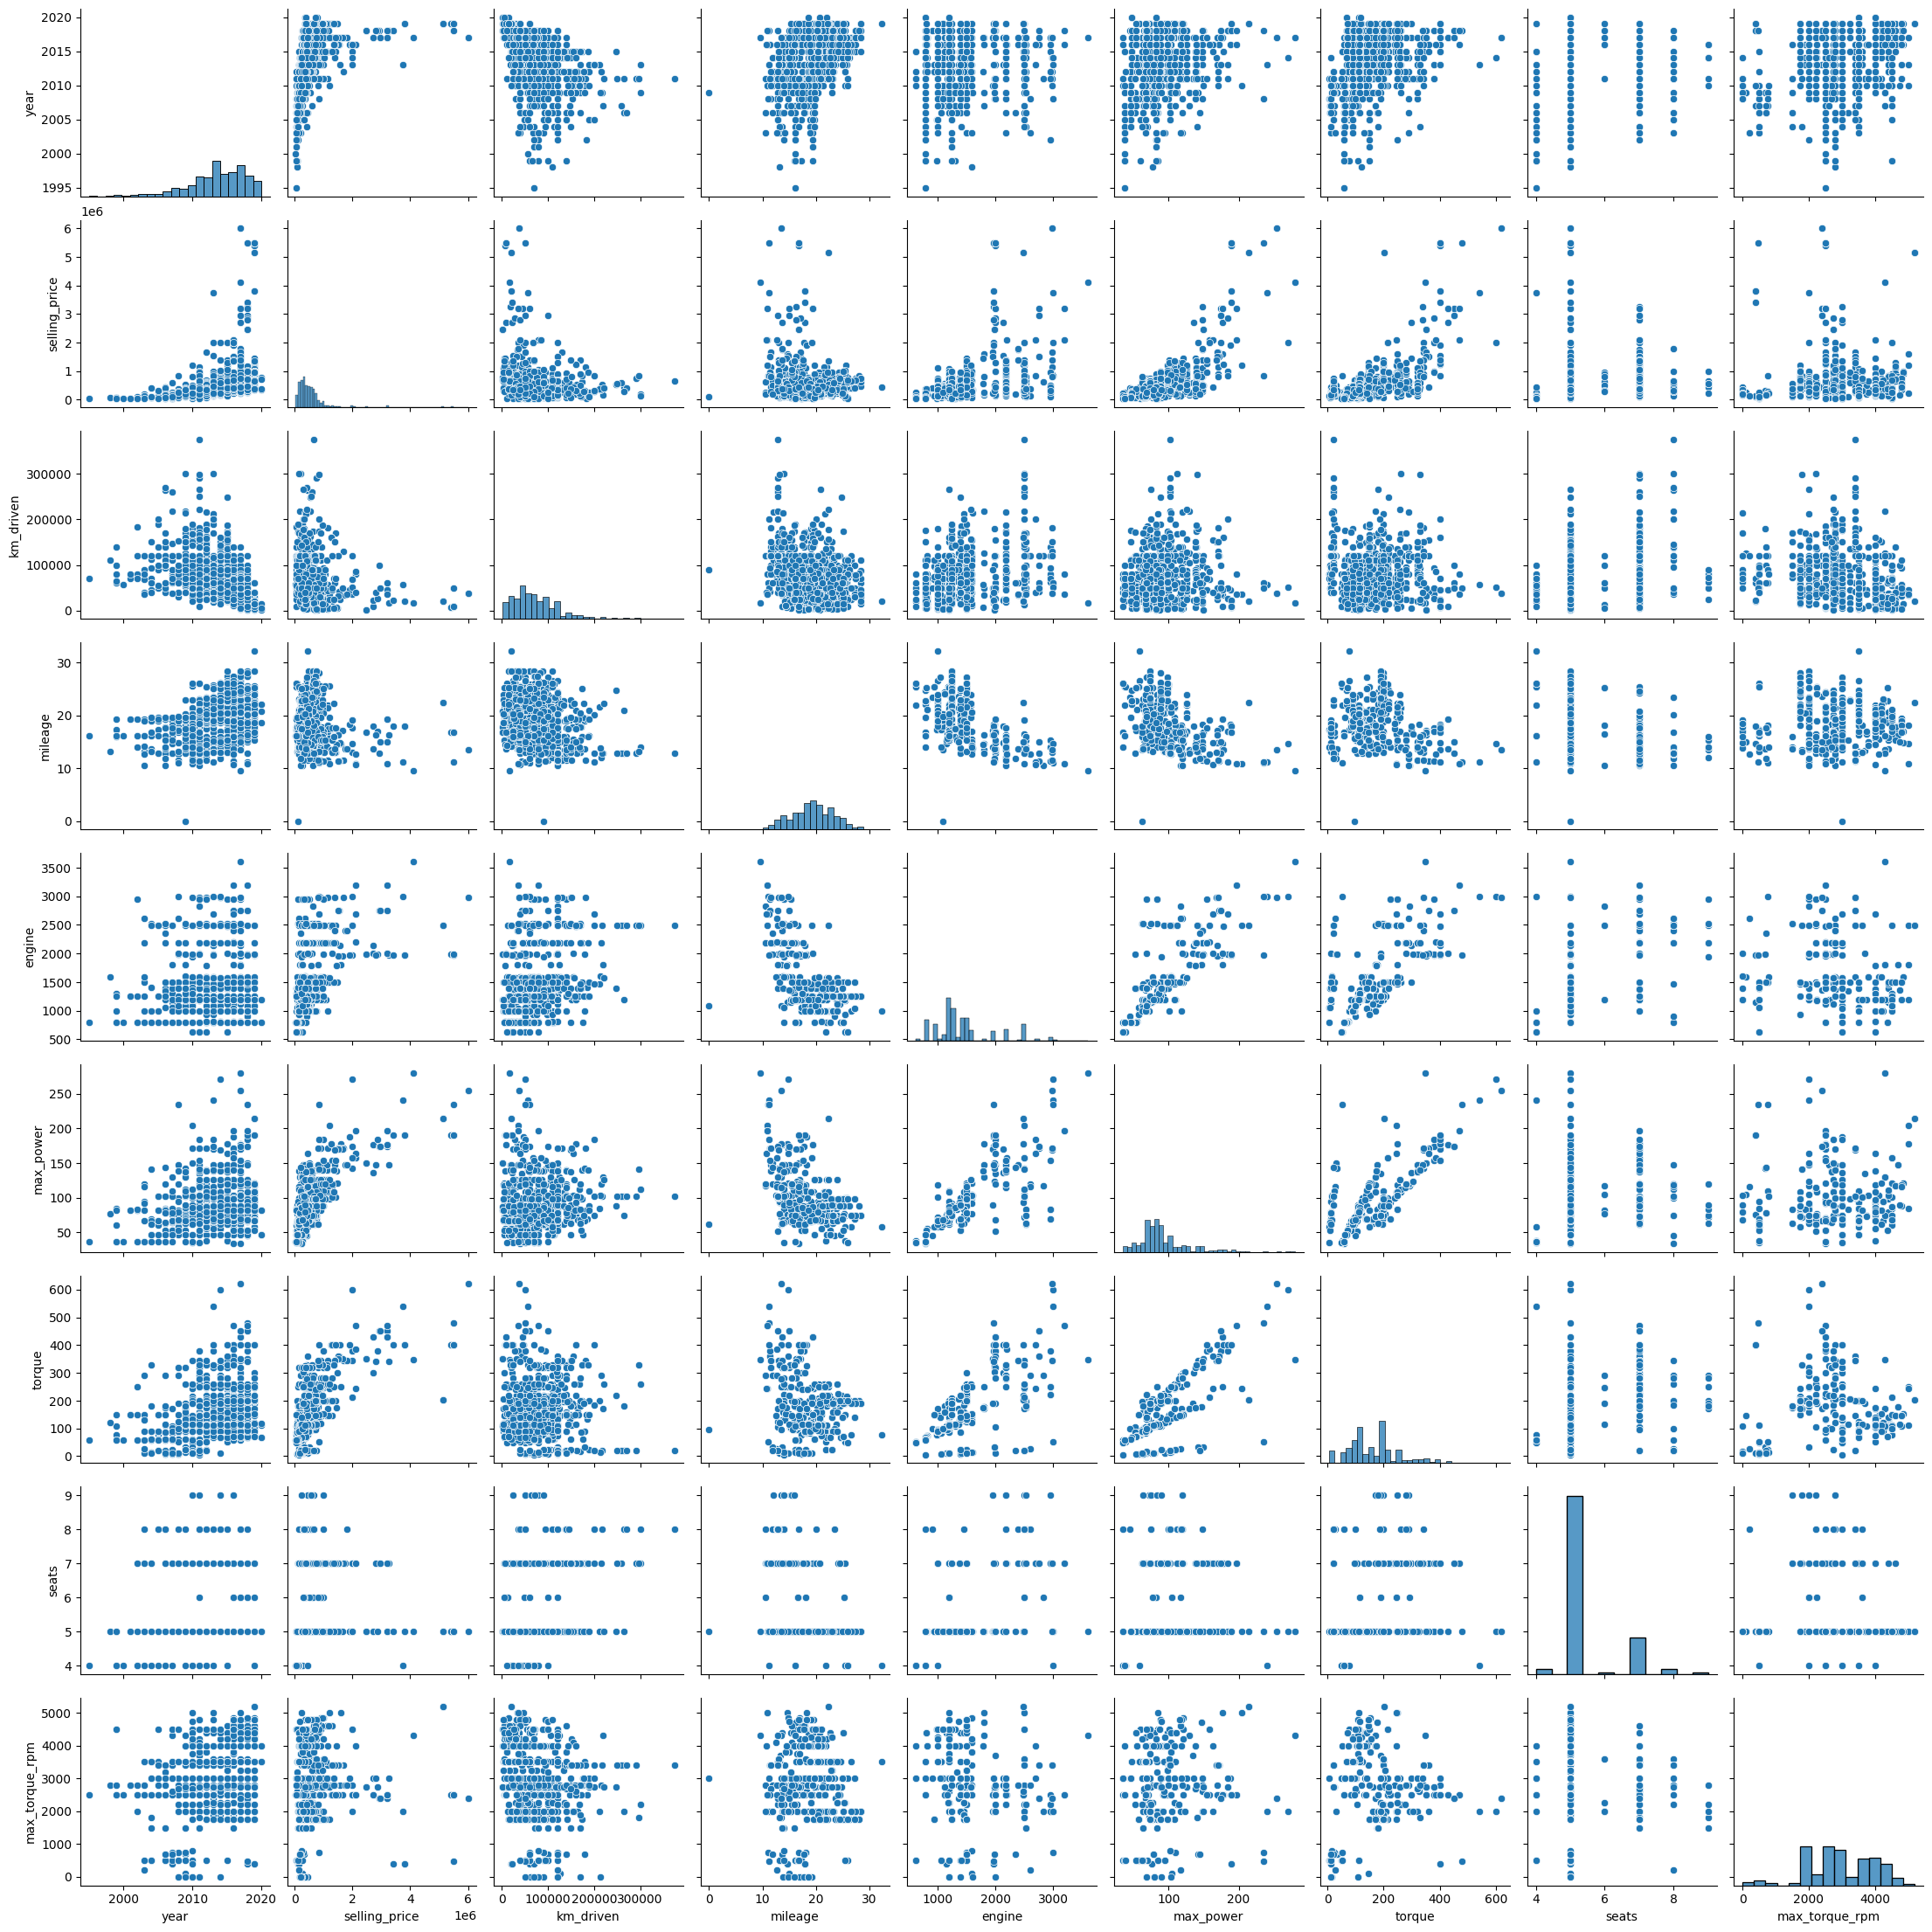

In [29]:
sns.pairplot(df_test)

__Ответ:__ я бы сказала, что совокупности похожи

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [30]:
# your code here
df_train.drop(columns=['selling_price']).corr(numeric_only=True)

year  km_driven   mileage    engine  max_power    torque  \
year            1.000000  -0.368966  0.341334  0.002819   0.157138  0.250026   
km_driven      -0.368966   1.000000 -0.182086  0.229766   0.024539  0.039318   
mileage         0.341334  -0.182086  1.000000 -0.572893  -0.374150 -0.132271   
engine          0.002819   0.229766 -0.572893  1.000000   0.681968  0.612447   
max_power       0.157138   0.024539 -0.374150  0.681968   1.000000  0.745596   
torque          0.250026   0.039318 -0.132271  0.612447   0.745596  1.000000   
seats           0.041178   0.192328 -0.451059  0.652172   0.244017  0.310769   
max_torque_rpm  0.219168  -0.235627 -0.053348 -0.222089  -0.009127 -0.155964   

                   seats  max_torque_rpm  
year            0.041178        0.219168  
km_driven       0.192328       -0.235627  
mileage        -0.451059       -0.053348  
engine          0.652172       -0.222089  
max_power       0.244017       -0.009127  
torque          0.310769       -0.155964  
seats           1.000000       -0.146342  
max_torque_rpm -0.146342        1.000000

<Axes: >

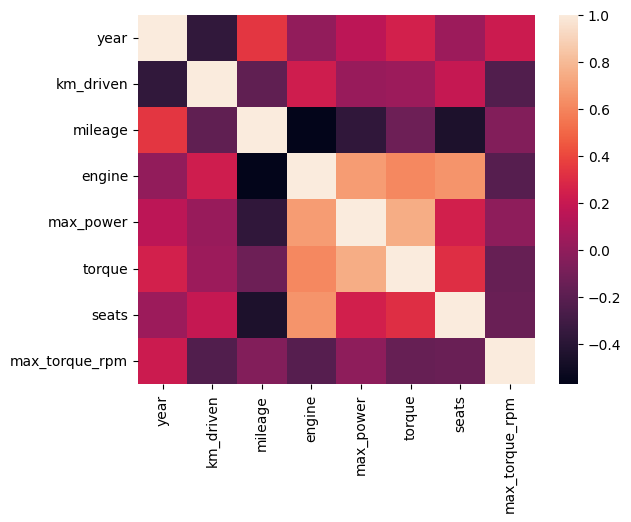

In [31]:
sns.heatmap(df_train.drop(columns=['selling_price']).corr(numeric_only=True))

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

__Ответ:__
- max_torque_rpm и max_power наименнее скоррелированы, так как модуль их коэффициента кореляции ближе всего к нулю
- torque и max_power, engine и max_power, engine и seats
- судя по коэффициенту, такая тенденция есть, но я бы не стала утверждать так

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [32]:
x = np.array([[3, 1, 4], [5, 2, 1]]).T
x = x[x[:, 0].argsort()]
# res = x[:, 0] - x[:, 1]
# res = np.where(res < 0, -1, res)
# res = np.where(res == 0, 0, res)
# res = np.where(res > 0, 1, res)
# res
xs = np.array([x[1:, 0] - x[:-1, 0]])
xs = np.where(xs < 0, -1, xs)
xs = np.where(xs==0, 0, xs )
xs = np.where(xs>0, 1, xs)

ys = np.array([x[1:, 1] - x[:-1, 1]])
ys = np.where(ys < 0, -1, ys)
ys = np.where(ys==0, 0, ys )
ys = np.where(ys>0, 1, ys)

In [33]:
x = np.array([[3, 1, 4], [5, 2, 1]]).T
x[:, 0].argsort()

array([1, 0, 2])

In [34]:
from scipy.stats import kendalltau

In [35]:
def kendall_corr(x, y):
    n = x.shape[0]
    # x = np.array([[3, 1, 4], [5, 2, 1]]).T
    idx = x.argsort()
    x = x[idx]
    y = y[idx]

    xs = np.array([x[1:] - x[:-1]])
    xs = np.where(xs < 0, -1, xs)
    xs = np.where(xs==0, 0, xs )
    xs = np.where(xs>0, 1, xs)

    ys = np.array([y[1:] - y[:-1]])
    ys = np.where(ys < 0, -1, ys)
    ys = np.where(ys==0, 0, ys )
    ys = np.where(ys>0, 1, ys)

    nd = (xs == -ys).sum()
    nc = (xs == ys).sum()
    return (nc - nd) / (0.5*n*(n-1))

In [36]:
kendalltau(df_train['selling_price'].values, df_train['km_driven'].values)

SignificanceResult(statistic=-0.2009737649047571, pvalue=5.404241708683998e-113)

In [37]:
# your code here

`Your answer here`

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [38]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [39]:
df_train.head(3)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   

  seller_type transmission         owner  mileage  engine  max_power  torque  \
0  Individual       Manual   First Owner    23.40    1248      74.00   190.0   
1  Individual       Manual  Second Owner    21.14    1498     103.52   250.0   
2  Individual       Manual   First Owner    23.00    1396      90.00    22.0   

   seats  max_torque_rpm  
0      5          2000.0  
1      5          2500.0  
2      5          2750.0

In [40]:
num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm', 'selling_price']
df_train_num = df_train[num_cols].copy()
y_train = df_train_num['selling_price']
X_train = df_train_num.drop(columns=['selling_price'])

In [41]:
# убрала ассерт, потому что числовых столбцов больше 6
# assert X_train.shape == (5840, 6)

In [42]:
df_test_num = df_test[num_cols].copy()
y_test = df_test_num['selling_price']
X_test = df_test_num.drop(columns=['selling_price'])

In [43]:
# убрала ассерт, потому что числовых столбцов больше 6
# assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()
model.fit(X_train, y_train)
preds_linreg = model.predict(X_test)
print('r2_score:', r2_score(y_test, preds_linreg))
print('MSE:', MSE(y_test, preds_linreg))

r2_score: 0.6032286271876575
MSE: 228075515152.4016


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [45]:
def r2(y_true, y_pred):
    num = np.power(y_true - y_pred, 2).sum()
    den = np.power(y_true - y_true.mean(), 2).sum()
    r2 = 1 - (num/den)
    return r2
print('r2_score_my:', r2(y_test, preds_linreg))

r2_score_my: 0.6032286271876575


`Your answer here`

$R^2 = \frac{\sum(y_{true}-y_{pred})^2}{\sum(y_{true}-y_{mean})^2}$,
- y_true - правильные ответы
- y_pred - предсказанные ответы
- y_mean - среднее правильных ответов

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [46]:
# your code here
def r2_adj(y_true, y_pred, num_of_features):
    num = np.power(y_true - y_pred, 2).sum()
    den = np.power(y_true - y_true.mean(), 2).sum()
    r2 = 1 - (num/den)
    r2_adj = 1 - (1 - r2) * ((y_true.shape[0] - 1) / (y_true.shape[0] - num_of_features - 1))
    return r2_adj
print('r2_adj:', r2_adj(y_test, preds_linreg, X_train.shape[1]))

r2_adj: 0.6000256292234811


`Your answer here`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [47]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
preds_linreg_scaled = model.predict(X_test_scaled)
print('r2_score:', r2_score(y_test, preds_linreg_scaled))
print('MSE:', MSE(y_test, preds_linreg_scaled))

r2_score: 0.603228627187651
MSE: 228075515152.4053


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

__Ответ:__ max_power

In [49]:
# your code here
print(*zip(model.coef_, df_train_num.columns), sep='\n')

(161222.69016176244, 'year')
(-47335.668782549794, 'km_driven')
(-5990.546065871451, 'mileage')
(20803.238382637817, 'engine')
(290753.99623386766, 'max_power')
(62924.12583581764, 'torque')
(-29466.962647292014, 'seats')
(-37186.50526098597, 'max_torque_rpm')


### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [50]:
from sklearn.linear_model import Lasso

# your code here
model = Lasso()
model.fit(X_train_scaled, y_train)
preds_lasso = model.predict(X_test_scaled)
print('r2_score:', r2_score(y_test, preds_lasso))
print('MSE:', MSE(y_test, preds_lasso))

r2_score: 0.6032272920026402
MSE: 228076282654.87656


In [51]:
print(*zip(model.coef_, df_train_num.columns), sep='\n')

(161220.4659341604, 'year')
(-47334.7892480163, 'km_driven')
(-5987.56682425508, 'mileage')
(20801.26293368317, 'engine')
(290755.5349524481, 'max_power')
(62923.24247728381, 'torque')
(-29463.24303451079, 'seats')
(-37184.66971773212, 'max_torque_rpm')


### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [52]:
# your code here
from sklearn.model_selection import GridSearchCV

alphas = [0.001, 0.001, 0.01, 0.1, 1, 10, 100]
model = Lasso()
grid = GridSearchCV(model, param_grid = {'alpha': alphas}, cv=10, scoring='r2')

In [53]:
%%time
grid.fit(X_train_scaled, y_train)

CPU times: user 469 ms, sys: 8.05 ms, total: 477 ms
Wall time: 481 ms


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [54]:
print(*zip(grid.best_estimator_.coef_, df_train_num.columns), sep='\n')

(160993.6524258738, 'year')
(-47246.07725824542, 'km_driven')
(-5687.718328023459, 'mileage')
(20582.208345489067, 'engine')
(290927.0695312695, 'max_power')
(62832.39199515932, 'torque')
(-29081.203588265016, 'seats')
(-37004.40487129152, 'max_torque_rpm')


In [55]:
preds_grid = grid.predict(X_test_scaled)
print('r2_score:', r2_score(y_test, preds_grid))
print('MSE:', MSE(y_test, preds_grid))

r2_score: 0.6030945876603163
MSE: 228152564900.30157


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

__Ответ:__
- обучение длилось 2.2сек
- alpha = 0.1, l1 = 0.001

In [56]:
# your code here
from sklearn.linear_model import ElasticNet

alphas = [0.001, 0.001, 0.01, 0.1, 1, 10, 100]
l1_ratios = [0.001, 0.001, 0.01, 0.1, 1]
model = ElasticNet()
grid = GridSearchCV(model, param_grid = {'alpha': alphas, 'l1_ratio': l1_ratios}, cv=10, scoring='r2')

In [57]:
%%time
grid.fit(X_train_scaled, y_train)

CPU times: user 2.56 s, sys: 9.52 ms, total: 2.57 s
Wall time: 2.65 s


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.001, 0.001, 0.01, 0.1, 1]},
             scoring='r2')

In [58]:
print(*zip(grid.best_estimator_.coef_, df_train_num.columns), sep='\n')

(144787.24100313926, 'year')
(-49471.57260978126, 'km_driven')
(-4176.590821878047, 'mileage')
(44728.67005965346, 'engine')
(236770.59270786948, 'max_power')
(87264.7443663352, 'torque')
(-32317.197273146914, 'seats')
(-23448.37940198052, 'max_torque_rpm')


In [59]:
preds_grid_elastic = grid.predict(X_test_scaled)
print('r2_score:', r2_score(y_test, preds_grid_elastic))
print('MSE:', MSE(y_test, preds_grid_elastic))

r2_score: 0.5835905320217756
MSE: 239364053032.09583


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [60]:
# your code here
from sklearn.linear_model import LinearRegression

class LinReg_L0(LinearRegression):
    def __init__(self, alpha=1.0):
        super().__init__()
        self.alpha = alpha

    def fit(self, X, y):
        super().fit(X, y)
        # Применяем Huber-like регуляризацию к коэффициентам
        self.coef_ -= self.alpha * (self.coef_ != 0).sum()  # Регуляризация по весам

        return self

model = LinReg_L0(alpha=0.01)
model.fit(X_train_scaled, y_train)

LinReg_L0(alpha=0.01)

In [61]:
preds_l0_reg = model.predict(X_test_scaled)
print('r2_score:', r2_score(y_test, preds_l0_reg))
print('MSE:', MSE(y_test, preds_l0_reg))

r2_score: 0.6032285402168949
MSE: 228075565145.67944


# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [62]:
# your code here
df_train.name = df_train.name.apply(lambda n: n.split()[0])
df_train = df_train.drop(columns=['selling_price'])
X_train_cat = df_train.copy()

df_test.name = df_test.name.apply(lambda n: n.split()[0])
df_test = df_test.drop(columns=['selling_price'])
X_test_cat = df_test.copy()

In [133]:
df_train.to_dict(orient='records')[0]

{'name': 'Maruti',
 'year': 2014,
 'km_driven': 145500,
 'fuel': 'Diesel',
 'seller_type': 'Individual',
 'transmission': 'Manual',
 'owner': 'First Owner',
 'mileage': 23.4,
 'engine': 1248,
 'max_power': 74.0,
 'torque': 190.0,
 'seats': 5,
 'max_torque_rpm': 2000.0}

In [63]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

In [64]:
X_test_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     1000    1000        1000         1000         1000
unique      25       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq       290     534         837          877          623

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [65]:
from sklearn.preprocessing import OneHotEncoder
# your code here
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
cat_feats_train = X_train_cat[['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']]
cat_feats_test = X_test_cat[['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']]

In [66]:
train_cats = ohe.fit_transform(cat_feats_train)
train_cats = pd.DataFrame(train_cats.toarray(), columns=[cat for cats in ohe.categories_ for cat in cats[1:]])
X_train_cat = pd.concat([X_train_cat.reset_index(), train_cats.reset_index()], axis=1)
X_train_cat = X_train_cat.drop(columns='index')
X_train_cat = X_train_cat.select_dtypes(include='number')

test_cats = ohe.transform(cat_feats_test)
test_cats = pd.DataFrame(test_cats.toarray(), columns=[cat for cats in ohe.categories_ for cat in cats[1:]])
X_test_cat = pd.concat([X_test_cat.reset_index(), test_cats.reset_index()], axis=1)
X_test_cat = X_test_cat.drop(columns='index')
X_test_cat = X_test_cat.select_dtypes(include='number')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [67]:
X_test_cat.shape, X_train_cat.shape

((1000, 55), (5840, 55))

In [68]:
X_train_cat.columns = [str(col) for col in X_train_cat.columns]
X_test_cat.columns = [str(col) for col in X_test_cat.columns]

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`
- Есть несколько шагов:
1. Проверить, что все одинаковые строки действительно одинаковы (например, нет лишних пробелов или букв)

2. Собрать категории только на обучающих данных, иначе может быть дата лик. Тестовые данные обрабатывать в соотвествии с обучающими

- Если суммировать все столбцы, мы получим полностью единичный столбец. Соотвественно, если из единичного столбца вычести сумму всех кроме одного, мы получим последний признак. То есть столбцы линейно зависимы.
- Скорее нет, так как из-за этого различные объекты окажутся более близкими друг с другу, так как получится больше объектов с нулевыми признаками

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [137]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
alphas = [0.001, 0.001, 0.01, 0.1, 1, 10, 100]
model = Ridge()
grid = GridSearchCV(model, param_grid = {'alpha': alphas}, cv=10, scoring='r2')

scaler = StandardScaler()
scaler.fit(X_train_cat)

X_train_scaled = scaler.transform(X_train_cat)
X_test_scaled = scaler.transform(X_test_cat)

In [70]:
%%time
grid.fit(X_train_scaled, y_train)

CPU times: user 1.03 s, sys: 941 ms, total: 1.97 s
Wall time: 1.68 s


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [71]:
print(*zip(grid.best_estimator_.coef_, df_train_num.columns), sep='\n')

(159319.1499533968, 'year')
(-28760.66290126568, 'km_driven')
(10713.242643582822, 'mileage')
(31453.741940690114, 'engine')
(154989.28041227086, 'max_power')
(65899.46041290092, 'torque')
(-71.24589925368818, 'seats')
(-26298.441659238957, 'max_torque_rpm')
(52354.04555899054, 'selling_price')


In [72]:
preds_ridge = grid.predict(X_test_scaled)
print('r2_score:', r2_score(y_test, preds_ridge))
print('MSE:', MSE(y_test, preds_ridge))

r2_score: 0.7915156556200047
MSE: 119842754553.18076


# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [73]:
def business_metrics(y_true, y_pred):
    # your code here
    diff = y_pred / y_true
    return ((diff >= 0.9) & (diff <= 1.1)).sum() / y_true.shape[0]

business_metrics(y_test, preds_linreg)

0.245

In [74]:
all_preds = {
    'linreg': preds_linreg,
    'linreg_scaled': preds_linreg_scaled,
    'lasso': preds_lasso,
    'lasso_grid': preds_grid,
    'elastic_gtid': preds_grid_elastic,
    'l0_reg': preds_l0_reg,
    'ridge_cat': preds_ridge
}
all_preds_metrics = {
    'metric': 'my_business_metric'
}
for model_name, preds in all_preds.items():
    all_preds_metrics[model_name] = business_metrics(y_test, preds)

pd.DataFrame(all_preds_metrics, index=[0])

metric  linreg  linreg_scaled  lasso  lasso_grid  elastic_gtid  \
0  my_business_metric   0.245          0.245  0.245       0.245          0.24   

   l0_reg  ridge_cat  
0   0.245      0.323

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [75]:
def your_business_metrics(y_true, y_pred, ratio=0.1, w_less=0.5, w_more=2):
    diff = y_pred / y_true
    diff_less = ((diff >= 1-ratio) & (diff < 1)).sum()
    diff_more = ((diff <= 1+ratio) & (diff >= 1)).sum()
    return (w_less * diff_less + w_more * diff_more) / y_true.shape[0]

In [76]:
all_preds = {
    'linreg': preds_linreg,
    'linreg_scaled': preds_linreg_scaled,
    'lasso': preds_lasso,
    'lasso_grid': preds_grid,
    'elastic_gtid': preds_grid_elastic,
    'l0_reg': preds_l0_reg,
    'ridge_cat': preds_ridge
}
all_preds_metrics_my = {
    'metric': 'my_business_metric'
}
for model_name, preds in all_preds.items():
    all_preds_metrics_my[model_name] = your_business_metrics(y_test, preds)

In [77]:
pd.DataFrame(all_preds_metrics_my, index=[0])

metric  linreg  linreg_scaled  lasso  lasso_grid  elastic_gtid  \
0  my_business_metric   0.301          0.301  0.301      0.2995        0.2715   

   l0_reg  ridge_cat  
0   0.301     0.4015

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [90]:
!pip install "fastapi[all]" -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.6/442.6 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 11.3 MB/s eta 0:00:00


In [79]:
import pickle

model_filename = 'model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(grid.best_estimator_, model_file)

In [115]:
with open("ohe_hot_encoder.pkl", "wb") as f:
    pickle.dump(ohe, f)

In [116]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [113]:
from fastapi import FastAPI, UploadFile, File
from fastapi.responses import StreamingResponse
from pydantic import BaseModel
from typing import List
import pickle
import uvicorn
import pandas as pd
import io

app = FastAPI()
cat_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']
fill_values = {
    'mileage': 19.369999999999997,
    'engine': 1248.0,
    'max_power': 81.86,
    'torque': 150.0,
    'seats': 5.0,
    'max_torque_rpm': 2800.0
 }

with open("./models/model.pkl", 'rb') as model_file:
    model = pickle.load(model_file)

with open("./models/ohe_hot_encoder.pkl", 'rb') as ohe_file:
    ohe = pickle.load(ohe_file)

with open("./models/scaler.pkl", 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

class Item(BaseModel):
    name: str
    year: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: float
    engine: int
    max_power: float
    torque: float
    seats: int
    max_torque_rpm: float

class Items(BaseModel):
    objects: List[Item]

def prepare_data(data):
    data = data.fillna(fill_values)
    data_cat = data[cat_features]
    ohe_cats = ohe.transform(data_cat)
    ohe_cats = pd.DataFrame(ohe_cats.toarray(), columns=[cat for cats in ohe.categories_ for cat in cats[1:]])
    data_cat = pd.concat([data.reset_index(), ohe_cats.reset_index()], axis=1)
    data_cat = data_cat.drop(columns='index')
    data_cat = data_cat.select_dtypes(include='number')
    data_cat.columns = [str(col) for col in data_cat.columns]

    data_scaled = scaler.transform(data_cat)

    return data_scaled

@app.post("/predict_item")
def predict_item(item: Item) -> float:
    data = pd.DataFrame(item.model_dump(), index=[0])
    data_scaled = prepare_data(data)
    prediction = model.predict(data_scaled)
    return prediction[0]

@app.post("/predict_items")
def predict_items(csvfile: UploadFile = File(...)) -> StreamingResponse:
    data = pd.read_csv(csvfile.file, index_col=0)
    data_scaled = prepare_data(data)
    prediction = model.predict(data_scaled)
    data['prediction'] = prediction

    stream = io.StringIO()
    data.to_csv(stream, index=False)
    response = StreamingResponse(iter([stream.getvalue()]),
                                 media_type="text/csv"
                                 )

    response.headers["Content-Disposition"] = "attachment; filename=result.csv"

    return response

if __name__ == '__main__':
    uvicorn.run('main:app', port=8000, reload=True) #host='127.0.0.1',

Overwriting main.py


In [114]:
!python3 main.py

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [19449] using WatchFiles
INFO:     Started server process [19476]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [19476]
INFO:     Stopping reloader process [19449]


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>